# Regression     


### Linear Model     
The goal of training a linear model is to minimize MSE(the loss function).    
\begin{align*}
L(\beta)=\frac{1}{n}\|y-X\beta\|_2^2
\end{align*}
To find the critical point of $L(\beta)$, calculate the first derivative:
\begin{align*}
\frac{\partial}{\partial \beta}L(\beta)&=\frac{\partial}{\partial \beta}\frac{1}{n}\|y-X\beta\|_2^2 \\
&= \frac{1}{n}\frac{\partial}{\partial \beta}(y-X\beta)^T(y-X\beta) \\
&= \frac{1}{n}\frac{\partial}{\partial \beta}(y^T y-2y^T X \beta + \beta^T X^T X \beta) \\
&= \frac{1}{n}(-2X^Ty+2X^TX\beta)
\end{align*}
Set it to 0:
\begin{align*}
\frac{1}{n}(-2X^Ty+2X^TX\beta) &= 0 \\
X^TX\beta &= X^Ty \\
\hat{\beta} &= (X^TX)^{-1}X^Ty \\
\end{align*}
To show that $\hat{\beta}$ is indeed the global minimal of $L$, checking the second order partial derivative is necessary (Hessian matrix). 
\begin{align*}
 \frac{\partial}{\partial \beta}\frac{1}{n}(-2X^Ty+2X^TX\beta) &= \frac{1}{n}(2X^TX) \\
\end{align*}
Then for any vector $u$:
\begin{align*}
\frac{2}{n}u^TX^TXu = \frac{2}{n}\|Xu\|^2_2 \geq 0
\end{align*}

Let's say we have 5 inputs $X=[3,6,7,8,11]$, and outputs $Y=[13, 8,11,2,6]$. To fit this dataset with a linear model:

[15. -1.]


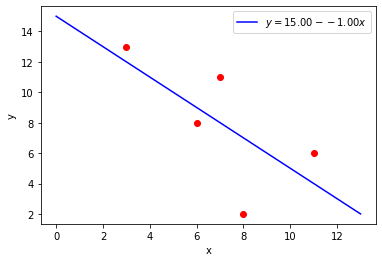

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Training dataset:
x = np.array([3, 6, 7, 8, 11])
y = np.array([13, 8, 11, 2, 6])

n = x.shape[0]
# stack a vector of ones for bias
X = np.stack((np.ones(n), x), axis=1)

# Compute beta hat
beta = np.linalg.inv(X.T @ X) @ X.T @ y
print(beta)

# Plot
xx = np.linspace(0, 13, 1000)
plt.scatter(x, y, color='red')
plt.plot(xx, beta[0] + beta[1] * xx, color='blue',
         label=f'$y = {beta[0]:.2f} - {beta[1]:.2f}x$')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


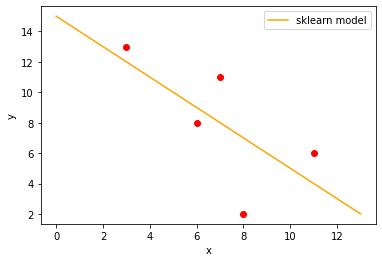

In [12]:
# Check with sklearn
from sklearn import linear_model
m = linear_model.LinearRegression().fit(x.reshape(-1, 1), y)

plt.scatter(x, y, color='red')
plt.plot(xx, m.predict(xx.reshape(-1, 1)), color='orange',
         label=f'sklearn model')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


#### Common linear models    
- linear model: $\hat{\beta} = \arg \min_{\beta} \frac{1}{n}\|y-X \beta\|^2_2$
- LASSO model: $\hat{\beta}_{\text{LASSO}} = \arg \min_{\beta} \frac{1}{n}\|y-X \beta\|^2_2 + \lambda \| \beta \|_1$
- Ridge model: $\hat{\beta}_{\text{Ridge}} = \arg \min_{\beta} \frac{1}{n}\|y-X \beta\|^2_2 + \alpha \| \beta \|_2^2$

where $\alpha$ and $\lambda$ are hyper-parameters. $\beta$ is the unknown parameter, or weights of the model.    
LASSO and Ridge model each introduces a penalty term to stabilize the weights. LASSO and Ridge will try to reduce the MSE to 0, but at the same time they don't want $\beta$ to be large.

In [13]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [15]:
# fix the random state
rs = np.random.RandomState(8964)

# create a dataset of X, y pairs
n = 1000                # number of samples
p = 10                  # number of features
noise = 0.4             # noise level
n_informative = p // 2  # number of useful features
X, y = make_regression(n, p, noise=noise,
                       n_informative=n_informative, random_state=rs)

# split dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.7, random_state=rs)

# Train the models
model_linear = LinearRegression().fit(X_train, y_train)
model_lasso = Lasso().fit(X_train, y_train)
model_ridge = Ridge().fit(X_train, y_train)

# Make prediction on the training data
y_pred_train_linear = model_linear.predict(X_train)
y_pred_train_lasso = model_lasso.predict(X_train)
y_pred_train_ridge = model_ridge.predict(X_train)

# Make prediction on the testing data
y_pred_test_linear = model_linear.predict(X_test)
y_pred_test_lasso = model_lasso.predict(X_test)
y_pred_test_ridge = model_ridge.predict(X_test)

Use pandas dataframe to make the results look nice.

In [31]:
import pandas as pd
loss_data = [
    ['linear',
     mean_squared_error(y_train, y_pred_train_linear),
     mean_squared_error(y_test, y_pred_test_linear),
     mean_absolute_error(y_train, y_pred_train_linear),
     mean_absolute_error(y_test, y_pred_test_linear)
     ],
    ['lasso',
     mean_squared_error(y_train, y_pred_train_lasso),
     mean_squared_error(y_test, y_pred_test_lasso),
     mean_absolute_error(y_train, y_pred_train_lasso),
     mean_absolute_error(y_test, y_pred_test_lasso)
     ],
    ['ridge',
     mean_squared_error(y_train, y_pred_train_ridge),
     mean_squared_error(y_test, y_pred_test_ridge),
     mean_absolute_error(y_train, y_pred_train_ridge),
     mean_absolute_error(y_test, y_pred_test_ridge)
     ]
]
loss_df = pd.DataFrame(loss_data, 
                       columns=['Model', 'train MSE', 'test MSE', 'train MAE', 'test MAE'])
loss_df

,Model,train MSE,test MSE,train MAE,test MAE
0,linear,0.155379,0.163835,0.313312,0.315385
1,lasso,5.959632,7.056500,1.957394,2.118424
2,ridge,0.223007,0.266782,0.376229,0.413542


LASSO performs terribly. By default, sklearn choose $\lambda = 1$. sklearn can automatically choose a proper $\lambda$ by cross validation(CV).

In [32]:
from sklearn.linear_model import LassoCV
model_lassoCV = LassoCV().fit(X_train, y_train)
y_pred_train_lassoCV = model_lassoCV.predict(X_train)
y_pred_test_lassoCV = model_lassoCV.predict(X_test)

loss_data.append([
    'lassoCV',
    mean_squared_error(y_train, y_pred_train_lassoCV),
    mean_squared_error(y_test, y_pred_test_lassoCV),
    mean_absolute_error(y_train, y_pred_train_lassoCV),
    mean_absolute_error(y_test, y_pred_test_lassoCV)
])
loss_df = pd.DataFrame(loss_data, 
                       columns=['Model', 'train MSE', 'test MSE', 'train MAE', 'test MAE'])
loss_df


,Model,train MSE,test MSE,train MAE,test MAE
0,linear,0.155379,0.163835,0.313312,0.315385
1,lasso,5.959632,7.056500,1.957394,2.118424
2,ridge,0.223007,0.266782,0.376229,0.413542
3,lassoCV,0.198772,0.226869,0.356854,0.379269


Lasso has been improved via CV.

### LASSO and Ridge
Dataset used: `data.csv`

In [34]:
import seaborn as sns
data = pd.read_csv('data/data.csv')
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,35.263158,155.631579,171.389474,169.084211,88.952632,32.215789,38.655263,36.263158,-164.884868
std,15.368772,35.781183,11.148259,11.173316,4.931791,3.371464,3.874985,3.403688,59.647385
min,19.000000,100.000000,152.800000,150.200000,79.400000,26.000000,31.000000,30.200000,-279.150000
25%,22.250000,131.750000,165.725000,163.575000,85.200000,29.500000,35.725000,33.800000,-203.085000
50%,30.000000,153.500000,171.950000,169.500000,89.400000,32.000000,38.550000,36.300000,-174.840000
75%,46.750000,174.000000,177.575000,175.725000,91.625000,34.475000,41.300000,38.325000,-119.925000
max,72.000000,293.000000,201.200000,198.400000,101.600000,39.600000,45.500000,43.100000,-30.950000


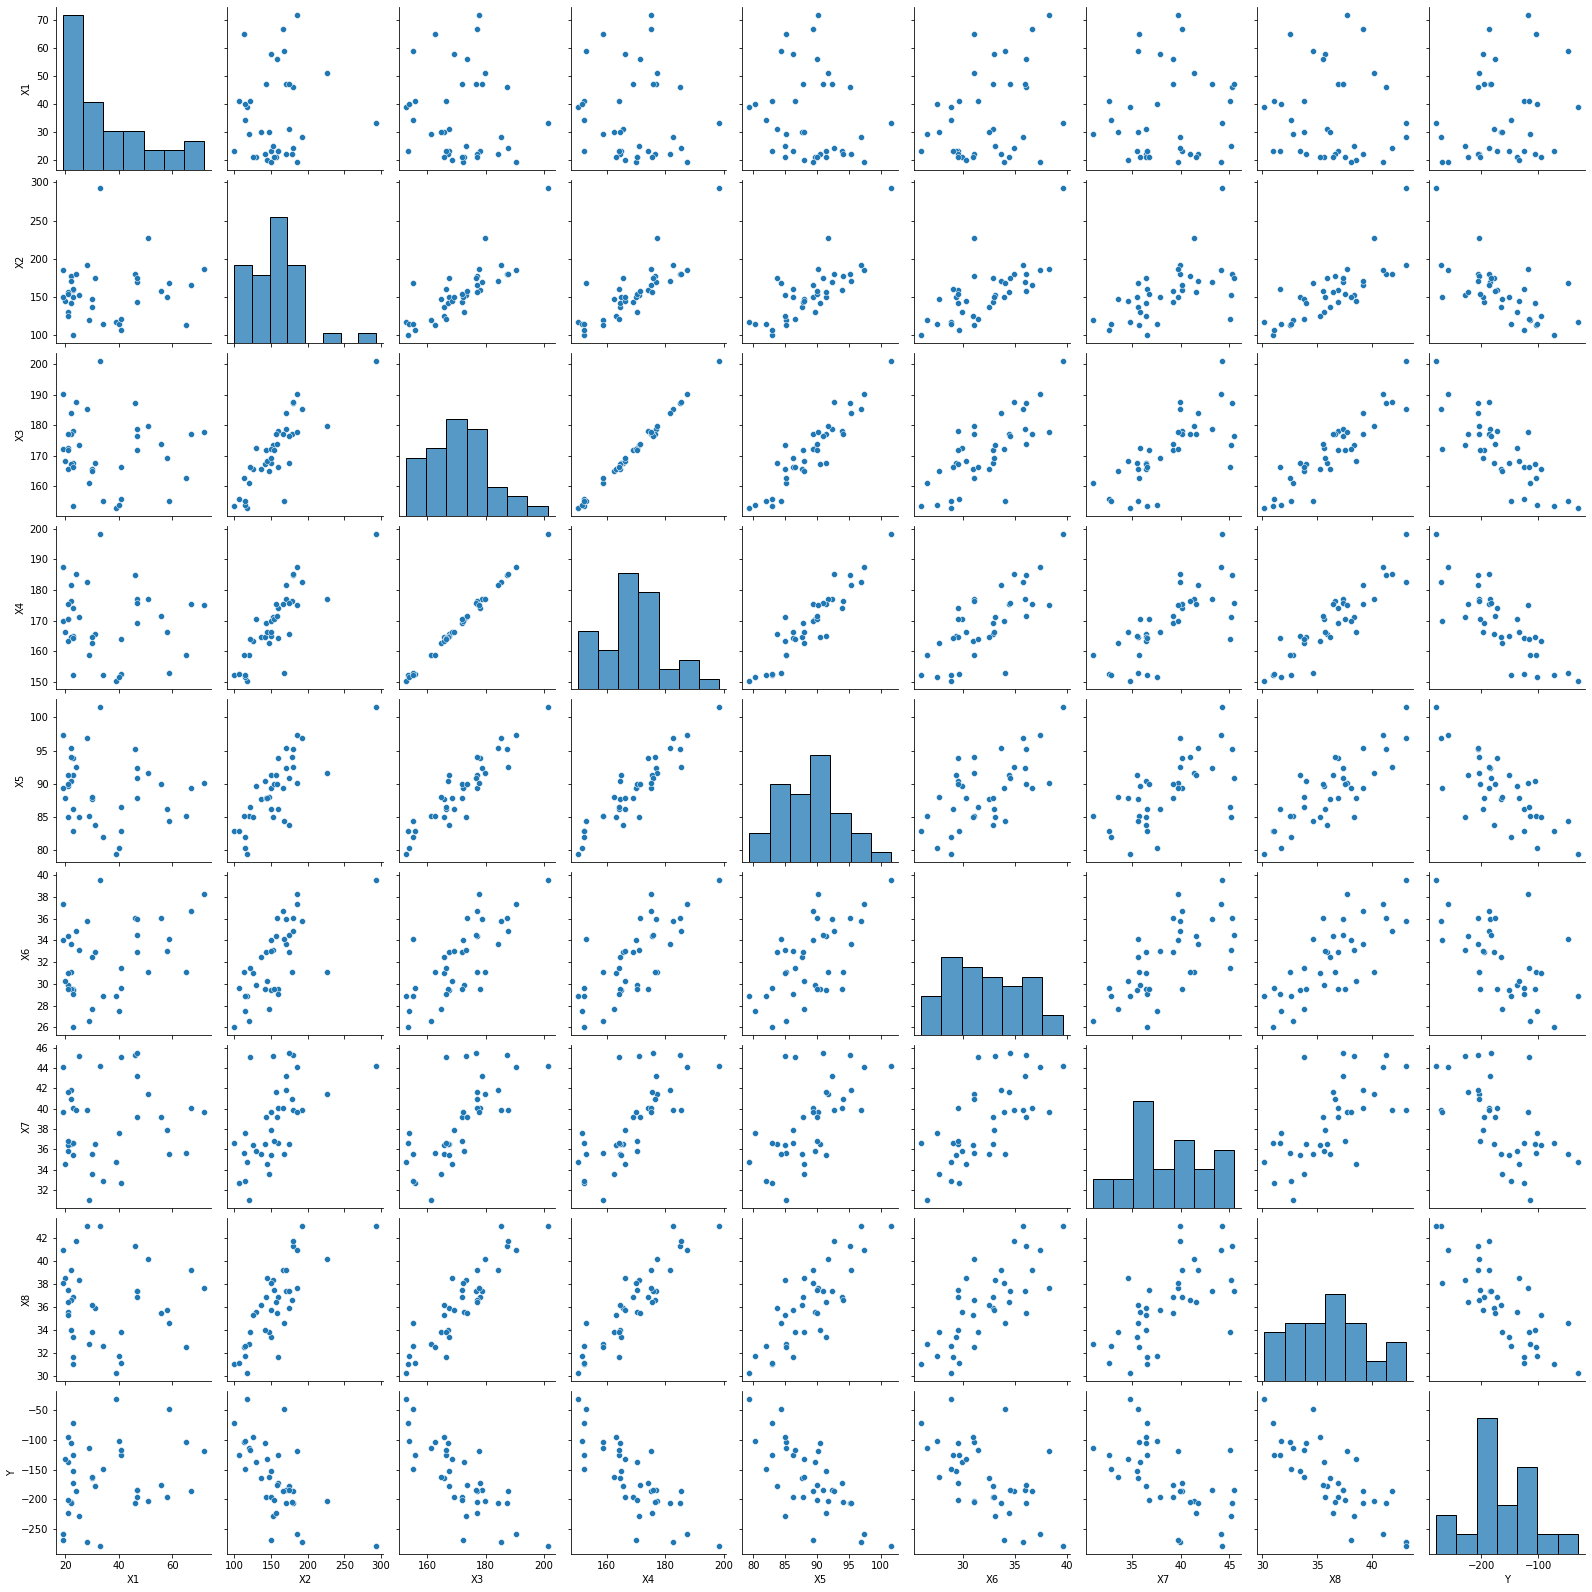

In [35]:
sns.pairplot(data)
plt.show()

{X3, X4}, {X4, X5} are highly correlated. In general, there's a large amount of muticollinearity in the dataset.

Potential issues:
- Can't compute MLE estimate of $\beta$ as the data matrix may be rank deficient and $X^TX$ may not be invertible.
- Interpretation of regression coefficients may not be as accurate as in non-collinear cases. Cannot hold one variable constant whilst change the other. 
- May expect larger standard error estimates for the regression coefficients.

LASSO and Ridge regression objectives place penalty terms, $\|\beta\|_1$ and $\|\beta\|_2^2$ respectively.
Therefore, the coefficient $\beta_j$ assigned to feature $j$ will be affected by the magnitude of the feature. A coefficient can be arbitrarily large because of this even if that feature isn't particularly important. 
So it is crucial to standardize the data to be on the same scale.

In [41]:
from sklearn.preprocessing import StandardScaler
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]
scaled_x = StandardScaler().fit_transform(X)
print(f"Feature Means: {scaled_x.mean(axis=0)}")        # 0 centered 
print(f"Feature Variances: {scaled_x.var(axis=0)}")     # variance = 1

Feature Means: [-2.92163954e-17  2.85955470e-16 -1.60251929e-15  1.80411242e-16
  1.84501537e-15 -1.05179023e-16  9.71445147e-17 -1.23439271e-16]
Feature Variances: [1. 1. 1. 1. 1. 1. 1. 1.]


How the hyper-parameters influence Ridge and LASSO?

#### Ridge

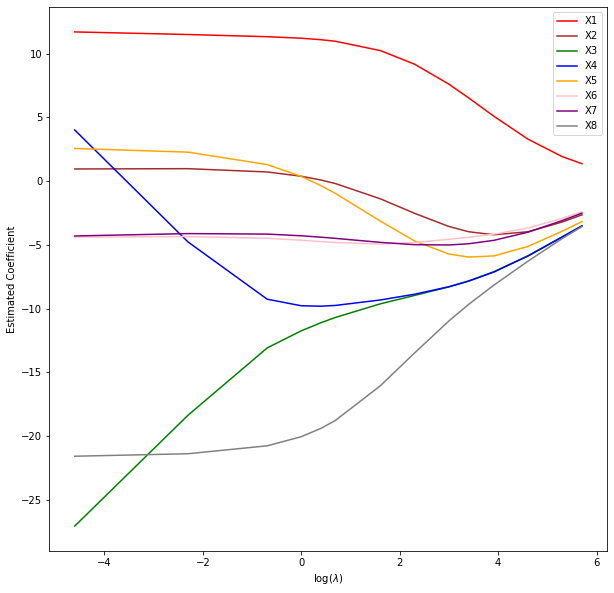

In [42]:
lambdas = [0.01, 0.1, 0.5, 1, 1.5, 2, 5, 10, 20, 30, 50, 100, 200, 300]
N = len(lambdas)
coef_matrix = np.zeros((scaled_x.shape[1], N))

for i in range(N):
    ridge = Ridge(alpha=lambdas[i]).fit(scaled_x, Y)
    coef_matrix[:, i] = ridge.coef_

colors = ['red', 'brown', 'green', 'blue', 'orange', 'pink', 'purple', 'grey']
plt.figure(figsize=(10, 10))
for i in range(X.shape[1]):
    lab = "X" + str(i + 1)
    plt.plot(np.log(lambdas), coef_matrix[i], label=lab, color=colors[i])
    plt.legend()
plt.xlabel(r"log($\lambda$)")
plt.ylabel("Estimated Coefficient")
plt.show()

Generally, as $\lambda$ increases, the value of the coefficients associated with each feature drops towards 0.

For very small values of $\lambda$, X3 and X4 had almost opposite coefficients, and as $\lambda$ is increased, they are given equal weight in the model. This is due to the nature of the 2 norm, which prefers to give uniform weight to variables that are interchangeable in the model, rather than remove one and keep the other as is the case with the 1-norm. These two variables are perfectly correlated so we see this effect much earlier. For the X5 variable, which is also strongly correlated, we see the model give all three variables uniform weight eventually. 

##### Find the optimal value via CV
Use Leave-One-Out Cross Validation(LOOCV) to find a good value of $\lambda$

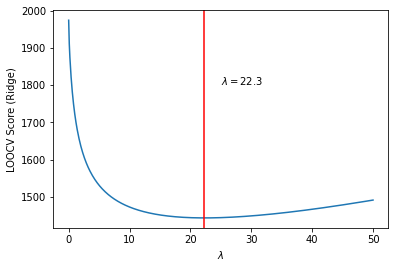

In [43]:
lambdas = np.arange(0, 50.1, step=0.1)
n = scaled_x.shape[0]
N = lambdas.shape[0]
CV_score = np.zeros(N)
curIdx = 0
Y = Y.to_numpy()
for L in lambdas:
    sq_errs = 0.
    for i in range(n):
        x_i = scaled_x[i]
        # dataset without i-th observation
        x_removed_i = np.delete(scaled_x, i, axis=0)
        y_i = Y[i]
        y_removed_i = np.delete(Y, i, axis=0)

        mod = Ridge(alpha=L).fit(x_removed_i, y_removed_i)
        sq_errs += (mod.predict(x_i.reshape(1, -1))-y_i)**2

    CV_score[curIdx] = sq_errs/n
    curIdx += 1

min_idx = np.argmin(CV_score)
plt.plot(lambdas, CV_score)
plt.xlabel(r"$\lambda$")
plt.ylabel("LOOCV Score (Ridge)")
plt.axvline(x=lambdas[min_idx], color="red")
plt.annotate(f"$\lambda = {lambdas[min_idx]}$", xy=(25, 1800))
plt.show()


#### LASSO

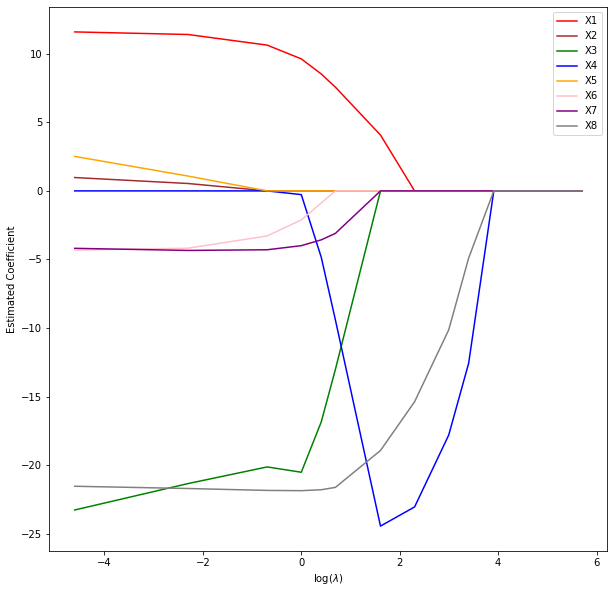

In [44]:
lambdas = [0.01, 0.1, 0.5, 1, 1.5, 2, 5, 10, 20, 30, 50, 100, 200, 300]
N = len(lambdas)
coef_matrix = np.zeros((scaled_x.shape[1], N))
for i in range(N):
    L = lambdas[i]
    lasso_lm = Lasso(alpha=L).fit(scaled_x, Y)
    coef_matrix[:, i] = lasso_lm.coef_

colors = ['red', 'brown', 'green', 'blue', 'orange', 'pink', 'purple', 'grey']
plt.figure(figsize=(10, 10))
for i in range(X.shape[1]):
    lab = "X" + str(i + 1)
    plt.plot(np.log(lambdas), coef_matrix[i], label=lab, color=colors[i])
    plt.legend()
plt.xlabel(r"log($\lambda$)")
plt.ylabel("Estimated Coefficient")
plt.show()


The pattern is similar to ridge case except that now the 1-norm penalty of the LASSO forces X4 to be zero and attached all weight to X3 since these two variables carry the same signal. In the ridge case the signal was spread uniformly across, but the LASSO prefers sparse solutions and so picks only one of them. The LASSO ends up setting all variables to zero as $\lambda$ is made to be increasingly large, something that does not happen in the Ridge case.

##### Find the optimal hyper-parameter for LASSO

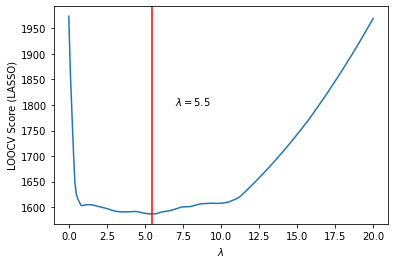

In [45]:
# throws a lot of annoying warnings for alpha=0.0 case, suppress them here
import warnings
warnings.filterwarnings("ignore")

lambdas = np.arange(0, 20.1, step=0.1)
n = scaled_x.shape[0]
N = lambdas.shape[0]
CV_score = np.zeros(N)
curIdx = 0
for L in lambdas:
    sq_errs = 0.
    for i in range(n):
        x_i = scaled_x[i]
        # dataset without i-th observation
        x_removed_i = np.delete(scaled_x, i, axis=0)
        y_i = Y[i]
        y_removed_i = np.delete(Y, i, axis=0)

        mod = Lasso(alpha=L).fit(x_removed_i, y_removed_i, )
        sq_errs += (mod.predict(x_i.reshape(1, -1))-y_i)**2

    CV_score[curIdx] = sq_errs/n
    curIdx += 1

min_idx = np.argmin(CV_score)
plt.plot(lambdas, CV_score)
plt.xlabel(r"$\lambda$")
plt.ylabel("LOOCV Score (LASSO)")
plt.axvline(x=lambdas[min_idx], color="red")
plt.annotate(f"$\lambda = {lambdas[min_idx]}$", xy=(7, 1800))
plt.show()


If the goal is prediction, then ridge is the preferred choice given the LOO analysis. If the goal is inference (understanding the relationship between response and covariates), then the LASSO gives us a much simpler model.